In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize, predict_localize_all
from utils.constants import NEG_CLASS

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
data_folder = "PZT"
subset_name = "PZT"

batch_size = 8
target_train_accuracy = 0.77
lr = 0.001
epochs = 30
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 10

In [3]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset PZT: N Images = 730, Share of anomalies = 0.500


In [4]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, 10, target_train_accuracy
)

Epoch 1/30: Loss = 0.2776, Accuracy = 0.8339
Early Stopping


In [6]:
model_path = f"weights/{subset_name}_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

Num Samples:  146
Accuracy: 0.9384
Balanced Accuracy: 0.9384
F1 score: 0.9419
Precision: 0.8902
Recall: 1.0000



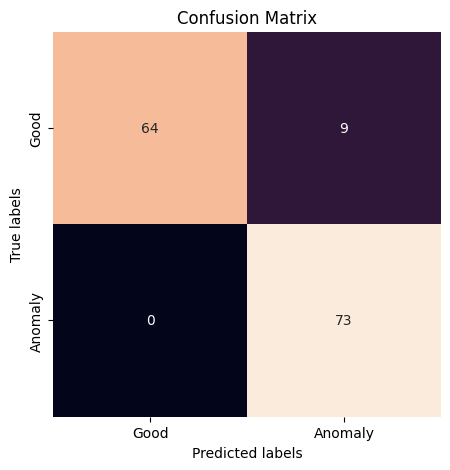

In [7]:
evaluate(model, test_loader, device)

-


AttributeError: 'DataFrame' object has no attribute 'append'

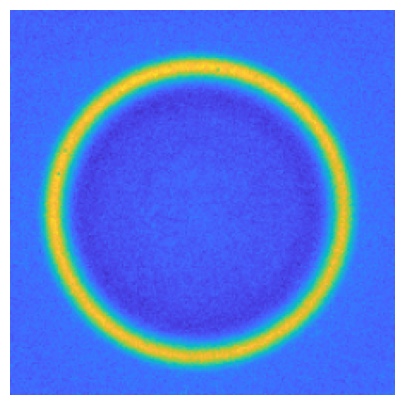

In [8]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, show_heatmap=True
)

In [ ]:
predict_localize_all(
    model, test_loader, device, thres=heatmap_thres, n_samples=9, show_heatmap=False
)